# Name Entity Recognition

## RNN

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/NationalNames.csv')

In [ ]:
data.shape

(1825433, 5)

In [ ]:
data.head()

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746


In [ ]:
data['Name'].unique()

array(['Mary', 'Anna', 'Emma', ..., 'Zijun', 'Zilas', 'Zirui'],
      dtype=object)

In [ ]:
data['Gender']=data['Gender'].astype('category').cat.codes

In [ ]:
df=data.groupby('Name').mean()['Gender'].reset_index()

In [ ]:
df

,Name,Gender
0,Aaban,1.0
1,Aabha,0.0
2,Aabid,1.0
3,Aabriella,0.0
4,Aadam,1.0
...,...,...
93884,Zytavious,1.0
93885,Zyvion,1.0
93886,Zyyanna,0.0
93887,Zyyon,1.0


In [ ]:
#convert the float to int
df['Gender']=df['Gender'].astype('int')

In [ ]:
df

,Name,Gender
0,Aaban,1
1,Aabha,0
2,Aabid,1
3,Aabriella,0
4,Aadam,1
...,...,...
93884,Zytavious,1
93885,Zyvion,1
93886,Zyyanna,0
93887,Zyyon,1


In [ ]:
import string
letters=list(string.ascii_lowercase)

In [ ]:
letters


['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

In [ ]:
vocab=dict(zip(letters,range(1,27)))

In [ ]:
vocab

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26}

In [ ]:
#create a reverse vocab
r_vocab=dict(zip(range(1,27),letters))

In [ ]:
r_vocab

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z'}

In [ ]:
df['Name'][1]

'Aabha'

In [ ]:
def word_to_number():
  for i in range(0,df.shape[0]):
    seq=[vocab[letters.lower()] for letters in df['Name'][i]]
    df['Name'][i]=seq

In [ ]:
df['Name']

0            Aaban
1            Aabha
2            Aabid
3        Aabriella
4            Aadam
           ...    
93884    Zytavious
93885       Zyvion
93886      Zyyanna
93887        Zyyon
93888        Zzyzx
Name: Name, Length: 93889, dtype: object

In [ ]:
word_to_number()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
df.head()

,Name,Gender
0,"[1, 1, 2, 1, 14]",1
1,"[1, 1, 2, 8, 1]",0
2,"[1, 1, 2, 9, 4]",1
3,"[1, 1, 2, 18, 9, 5, 12, 12, 1]",0
4,"[1, 1, 4, 1, 13]",1


In [ ]:
x=df['Name'].values
y=df['Gender'].values

In [ ]:
name_length=[len(x[i]) for i in range(0,df.shape[0])]


In [ ]:
unique, counts = np.unique(name_length, return_counts=True)
print(np.asarray((unique, counts)).T)

[[    2   147]
 [    3   942]
 [    4  5141]
 [    5 15774]
 [    6 26116]
 [    7 24397]
 [    8 13500]
 [    9  5211]
 [   10  1661]
 [   11   573]
 [   12   211]
 [   13   122]
 [   14    61]
 [   15    33]]


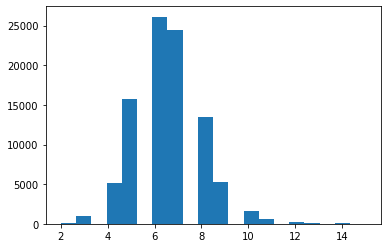

In [ ]:
plt.hist(name_length,bins=20)
plt.show()


In [ ]:
#make the sequence to same length we have to pad it with zeros at beginning
from keras.preprocessing.sequence import pad_sequences
x=pad_sequences(df['Name'].values,maxlen=10,padding='pre')


In [ ]:
df['Name'][0]

[1, 1, 2, 1, 14]

In [ ]:
x[0]

array([ 0,  0,  0,  0,  0,  1,  1,  2,  1, 14], dtype=int32)

In [ ]:
#build the model
from keras.layers import Input,Embedding,Dense,LSTM
from keras.models import Model
vocab_size=len(vocab)+1
input=Input(shape=(10,))
emn=Embedding(input_dim=vocab_size,output_dim=5)(input)
lstm1=LSTM(units=32,return_sequences=True)(emn)
lstm2=LSTM(units=64)(lstm1)
out=Dense(units=1,activation='sigmoid')(lstm2)
my_model=Model(inputs=input,outputs=out)



In [ ]:
my_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 10)]              0         
                                                                 
 embedding (Embedding)       (None, 10, 5)             135       
                                                                 
 lstm (LSTM)                 (None, 10, 32)            4864      
                                                                 
 lstm_1 (LSTM)               (None, 64)                24832     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 29,896
Trainable params: 29,896
Non-trainable params: 0
_________________________________________________________________


In [ ]:
my_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
hist = my_model.fit(x,y,epochs=5,batch_size=32,validation_split=0.2)

Epoch 1/5
2348/2348 [==============================] - 25s 8ms/step - loss: 0.4397 - accuracy: 0.7875 - val_loss: 0.3864 - val_accuracy: 0.8211
Epoch 2/5
2348/2348 [==============================] - 20s 9ms/step - loss: 0.3884 - accuracy: 0.8172 - val_loss: 0.3782 - val_accuracy: 0.8266
Epoch 3/5
2348/2348 [==============================] - 19s 8ms/step - loss: 0.3774 - accuracy: 0.8244 - val_loss: 0.3728 - val_accuracy: 0.8322
Epoch 4/5
2348/2348 [==============================] - 17s 7ms/step - loss: 0.3680 - accuracy: 0.8292 - val_loss: 0.3627 - val_accuracy: 0.8346
Epoch 5/5
2348/2348 [==============================] - 25s 11ms/step - loss: 0.3581 - accuracy: 0.8332 - val_loss: 0.3547 - val_accuracy: 0.8379


In [ ]:
my_model.metrics_names

['loss', 'accuracy']

Text(0.5, 1.0, 'Training and validation loss')

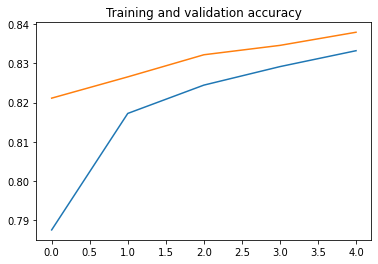

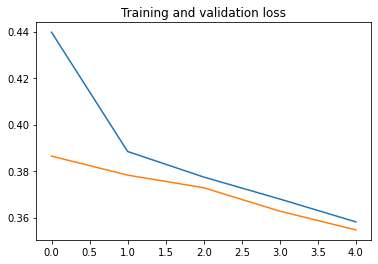

In [ ]:

# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc=hist.history['accuracy']
val_acc = hist.history['val_accuracy']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = hist.history['loss']
val_loss = hist.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')


In [ ]:
def predict_name(name):
  name=name
  test_name=name.lower()
  seq=[vocab[i] for i in test_name]
  x_test=pad_sequences([seq],10)
  y_pred=my_model.predict(x_test)
  if(y_pred>0.5):
    print(name,": Male")
  else:
    print(name,": Female")

In [ ]:
predict_name("adam")
predict_name("eve")
predict_name("cynthia")
predict_name("gloria")
predict_name("arul")

adam : Male
eve : Female
cynthia : Female
gloria : Female
arul : Male


## Bidirectional LSTM

In [ ]:
from keras.layers import Input,Embedding,Dense,LSTM, Bidirectional

In [ ]:
#build the model
from keras.layers import Input,Embedding,Dense,LSTM, Bidirectional
from keras.models import Model, Sequential
vocab_size=len(vocab)+1
#input=Input(shape=(10,))
#emn=Embedding(input_dim=vocab_size,output_dim=5)(input)
#lstm1=Bidirectional(LSTM(units=32,return_sequences=True)(emn))
#lstm2=Bidirectional(LSTM(units=64)(lstm1))
#out=Dense(units=1,activation='sigmoid')(lstm2)
#my_model=Model(inputs=input,outputs=out)

my_model=Sequential()
my_model.add(Input(shape=(10,)))
my_model.add(Embedding(input_dim=vocab_size,output_dim=5))
my_model.add(Bidirectional(LSTM(32,return_sequences=True)))
my_model.add(Bidirectional(LSTM(64,return_sequences=False)))
my_model.add(Dense(1))


In [ ]:
my_model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_14 (Embedding)    (None, 10, 5)             135       
                                                                 
 bidirectional_33 (Bidirecti  (None, 10, 64)           9728      
 onal)                                                           
                                                                 
 bidirectional_34 (Bidirecti  (None, 128)              66048     
 onal)                                                           
                                                                 
 dense_17 (Dense)            (None, 1)                 129       
                                                                 
Total params: 76,040
Trainable params: 76,040
Non-trainable params: 0
_________________________________________________________________


In [ ]:
my_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
hist = my_model.fit(x,y,epochs=5,batch_size=32,validation_split=0.2)

Epoch 1/5
2348/2348 [==============================] - 32s 11ms/step - loss: 0.5237 - accuracy: 0.7454 - val_loss: 0.4936 - val_accuracy: 0.7991
Epoch 2/5
2348/2348 [==============================] - 32s 14ms/step - loss: 0.4925 - accuracy: 0.7654 - val_loss: 0.4150 - val_accuracy: 0.8168
Epoch 3/5
2348/2348 [==============================] - 29s 12ms/step - loss: 0.4368 - accuracy: 0.8050 - val_loss: 0.4188 - val_accuracy: 0.8255
Epoch 4/5
2348/2348 [==============================] - 25s 11ms/step - loss: 0.4446 - accuracy: 0.8012 - val_loss: 0.4505 - val_accuracy: 0.7551
Epoch 5/5
2348/2348 [==============================] - 29s 12ms/step - loss: 0.4676 - accuracy: 0.7942 - val_loss: 0.4110 - val_accuracy: 0.8234


Text(0.5, 1.0, 'Training and validation loss')

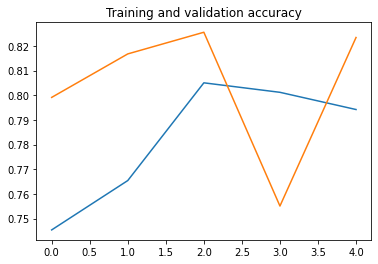

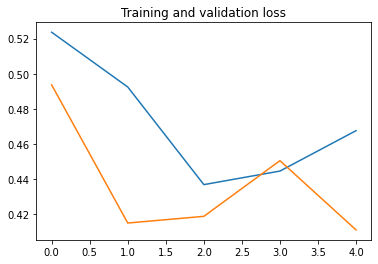

In [ ]:

# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc=hist.history['accuracy']
val_acc = hist.history['val_accuracy']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = hist.history['loss']
val_loss = hist.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')


In [ ]:
def predict_name(name):
  name=name
  test_name=name.lower()
  seq=[vocab[i] for i in test_name]
  x_test=pad_sequences([seq],10)
  y_pred=my_model.predict(x_test)
  if(y_pred>0.5):
    print(name,": Male")
  else:
    print(name,": Female")

In [ ]:
predict_name("adam")
predict_name("eve")
predict_name("cynthia")
predict_name("gloria")
predict_name("arul")

adam : Male
eve : Female
cynthia : Female
gloria : Female
arul : Male
